# Wine data analysis -- Pubali Mondal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [3]:
df = pd.read_csv(r"C:\Users\dibak\Downloads\WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
#we see that id column is unecessary for our analysis so we drop it 
df = df.drop("Id",axis=1)
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


# Data Visualization

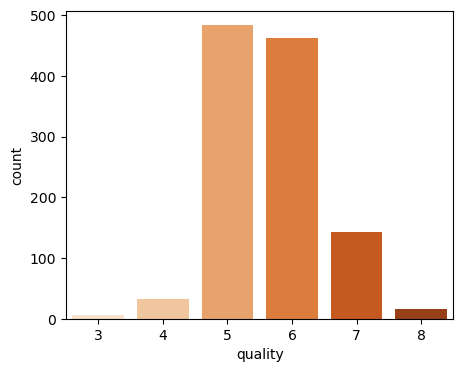

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x='quality',data=df,palette='Oranges')
plt.show()


we see wine with quality 5 followed by quality 6 have max count and quality 3 have min count 

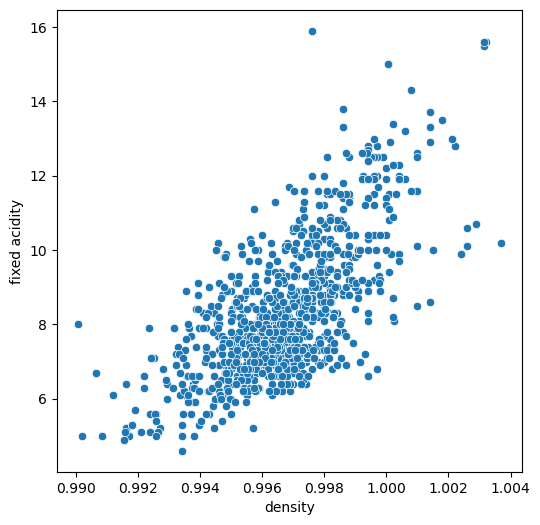

In [15]:
#Ploating a scatterplot between density vs fixed acidity.
plt.figure(figsize=(6,6))
sns.scatterplot(x='density',y='fixed acidity',data=df)
plt.show()

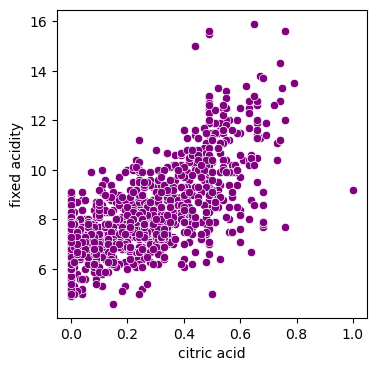

In [21]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='citric acid',y='fixed acidity',data=df,color="Purple")
plt.show()

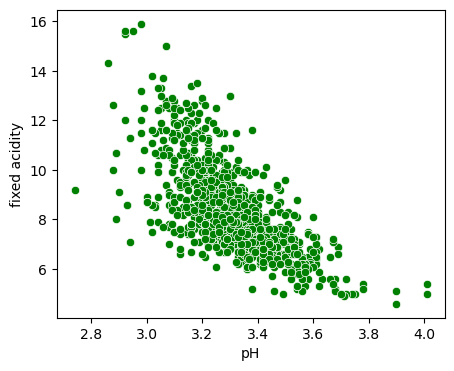

In [22]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='pH',y='fixed acidity',data=df,color="Green")
plt.show()

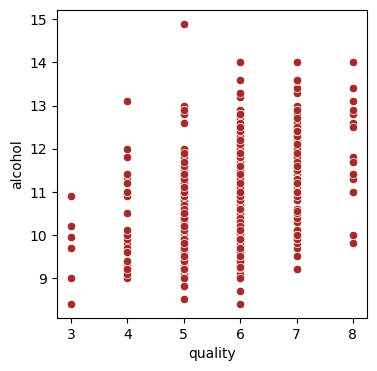

In [24]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='quality',y='alcohol',data=df,color="Brown")
plt.show()

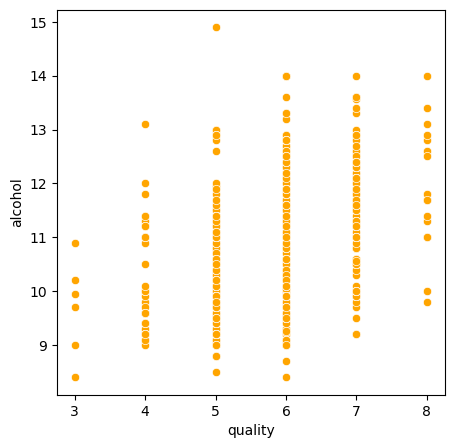

In [26]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='quality',y='alcohol',data=df,color="Orange")
plt.show()

# splitting data

In [28]:
x = df.drop(["quality"],axis=1)
y = df["quality"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [29]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

# logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.68      0.70      0.69       189
           6       0.51      0.73      0.60       180
           7       0.33      0.03      0.06        64
           8       0.00      0.00      0.00         7

    accuracy                           0.58       458
   macro avg       0.25      0.24      0.22       458
weighted avg       0.53      0.58      0.53       458

Accuracy of Logistic Regression is :  58.07860262008734


C:\Users\dibak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dibak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dibak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.4497816593886463
Mean Squared Error :  0.5109170305676856
Root Mean Squared Error :  0.7147846043163532
R2 Score :  0.25602382456456996


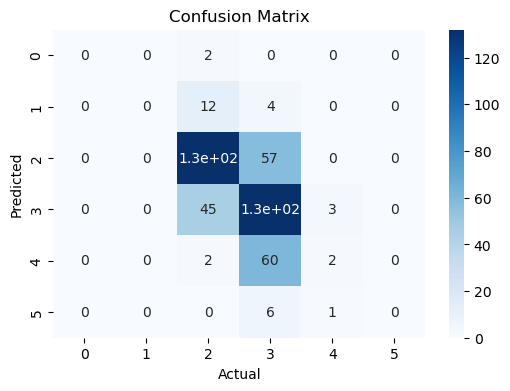

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,regpred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# decision tree 

In [34]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.12      0.17        16
           5       0.59      0.57      0.58       189
           6       0.47      0.54      0.50       180
           7       0.41      0.31      0.35        64
           8       0.00      0.00      0.00         7

    accuracy                           0.50       458
   macro avg       0.29      0.26      0.27       458
weighted avg       0.49      0.50      0.49       458

Accuracy of Decision Tree is :  49.56331877729257


In [35]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.5764192139737991
Mean Squared Error :  0.7205240174672489
Root Mean Squared Error :  0.8488368615153614
R2 Score :  -0.04919717048586292


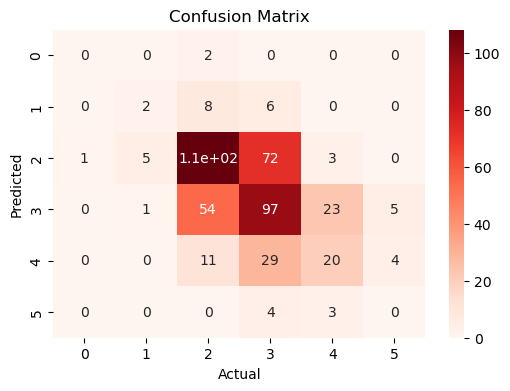

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,dtreepred),annot=True,cmap="Reds")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Random forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.70      0.71      0.71       189
           6       0.56      0.67      0.61       180
           7       0.50      0.36      0.42        64
           8       0.00      0.00      0.00         7

    accuracy                           0.61       458
   macro avg       0.29      0.29      0.29       458
weighted avg       0.58      0.61      0.59       458

Accuracy of Random Forest is is :  60.91703056768559


C:\Users\dibak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dibak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dibak\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.42358078602620086
Mean Squared Error :  0.4890829694323144
Root Mean Squared Error :  0.6993446714119687
R2 Score :  0.28781767821565674


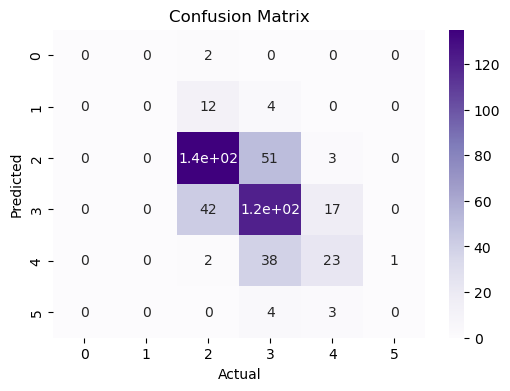

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,rfpred),annot=True,cmap="Purples")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# model performance 

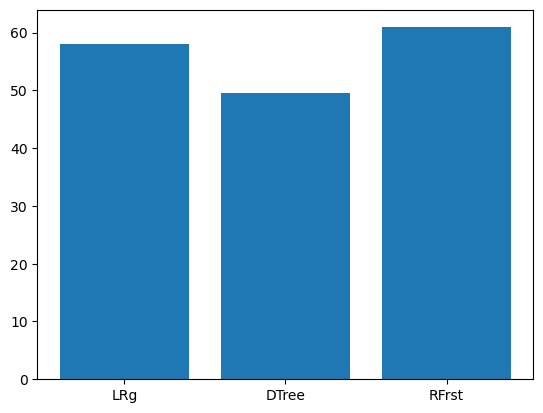

In [49]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LRg','DTree','RFrst']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

# feature importance

In [52]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=True)
print(feature_importances)

                 feature  importance
5    free sulfur dioxide    0.060984
3         residual sugar    0.069669
0          fixed acidity    0.071650
8                     pH    0.074965
2            citric acid    0.077750
4              chlorides    0.084926
7                density    0.088427
1       volatile acidity    0.095297
6   total sulfur dioxide    0.098663
9              sulphates    0.124961
10               alcohol    0.152709


# ***Conclusion from the above analysis***
Random Forest leads with higher accuracy compared to Logistic Regression and Decision Tree.

According to Feature Importance, "alcohol","sulphates","volatile acidity" are the features with highest scores. Implies those are the dominating features used to predict the quality of wine.

Data is sightly imbalanced with the quality of wines ranging between "5" and "6" in the majority.

